# Catching Up & Happy Birthday

First of all, let me say I'm sorry for missing last week's tutorial, but I have a very good excuse:

<figure>
    <center><img src="https://github.com/GalKepler/ml_for_neuro/blob/04e93eb771df3cdfb2aa4941c9ea0932ff49b24e/ml_for_neuro/chapters/catching_up/Luna.jpeg?raw=true" alt="Luna Kepler" width="400"/></center>
    <figcaption>
        <i>
            Luna Kepler was born on January 18th, 2024, and was the cause of ML for Neuroscientists' tutor to be absent from class.
            <a href="https://www.fatherly.com/parenting/excuses-for-missing-work-baby">
                Fatherly
            </a>
        </i>
    </figcaption>
</figure>

## Exploratory Data Analysis (EDA)

Our main goal while doing EDA is to [summarize main characteristics of our dataset](https://en.wikipedia.org/wiki/Exploratory_data_analysis).

It's crucial that we understand what our data is composed of.

### First, we take a look.

````{toggle} configuration.py
    :show:
```{literalinclude} configuration.py   
```
````

In [1]:
from read_data import read_data # read data from file at a destinaiton defined in configuration.py
from get_scattered_chunks import get_scattered_chunks # get scattered chunks of data
from print_table import print_table # Styling and printing the table
import pandas as pd
pd.set_option("future.no_silent_downcasting", True)

In [2]:
data = read_data()
data_chunks = get_scattered_chunks(data, n_chunks=5, chunk_size=3)
print_table(data_chunks)

,test_name,swab_type,covid19_test_results,age,high_risk_exposure_occupation,high_risk_interactions,diabetes,chd,htn,cancer,asthma,copd,autoimmune_dis,smoker,temperature,pulse,sys,dia,rr,sats,rapid_flu_results,rapid_strep_results,ctab,labored_respiration,rhonchi,wheezes,days_since_symptom_onset,cough,cough_severity,fever,sob,sob_severity,diarrhea,fatigue,headache,loss_of_smell,loss_of_taste,runny_nose,muscle_sore,sore_throat,er_referral
0,SARS COV 2 RNA RTPCR,Nasopharyngeal,False,58,True,nan,False,False,False,False,False,False,False,False,36.950000,81.000000,126.000000,82.000000,18.000000,97.000000,nan,nan,False,False,False,False,28.000000,True,Severe,nan,False,nan,False,False,False,False,False,False,False,False,False
1,"SARS-CoV-2, NAA",Oropharyngeal,False,35,False,nan,False,False,False,False,False,False,False,False,36.750000,77.000000,131.000000,86.000000,16.000000,98.000000,nan,nan,False,False,False,False,nan,True,Mild,False,False,nan,False,False,False,False,False,False,False,False,False
2,SARS CoV w/CoV 2 RNA,Oropharyngeal,False,12,nan,nan,False,False,False,False,False,False,False,False,36.950000,74.000000,122.000000,73.000000,17.000000,98.000000,nan,nan,nan,nan,nan,nan,nan,False,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,False
23498,"SARS-CoV-2, NAA",Nasal,False,35,False,False,False,False,False,False,False,False,False,False,37.000000,69.000000,136.000000,84.000000,12.000000,100.000000,nan,nan,False,nan,nan,nan,nan,False,nan,False,False,nan,False,False,False,False,False,False,False,False,nan
23499,"SARS-CoV-2, NAA",Nasal,False,24,False,True,False,False,False,False,False,False,False,False,36.750000,70.000000,128.000000,78.000000,12.000000,99.000000,nan,nan,nan,False,False,False,nan,False,nan,False,False,nan,False,False,False,False,False,False,False,False,nan
23500,"SARS-CoV-2, NAA",Nasal,False,52,False,False,False,False,False,False,False,False,False,False,37.000000,94.000000,165.000000,82.000000,12.000000,98.000000,nan,nan,nan,False,False,False,7.000000,True,nan,False,False,nan,False,False,False,False,False,False,False,False,nan
46996,"SARS-CoV-2, NAA",Nasal,False,11,False,False,False,False,False,False,False,False,False,False,36.900000,78.000000,116.000000,79.000000,16.000000,100.000000,nan,nan,True,False,True,True,nan,False,nan,False,False,nan,False,False,False,False,False,False,False,False,nan
46997,"SARS-CoV-2, NAA",Nasal,False,30,False,False,False,False,False,False,False,False,False,False,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,False,nan,False,False,nan,False,False,False,False,False,False,False,False,nan
46998,"SARS-CoV-2, NAA",Nasal,False,36,False,False,False,False,False,False,False,False,False,False,36.850000,81.000000,122.000000,81.000000,14.000000,100.000000,nan,nan,nan,False,nan,nan,7.000000,True,Mild,False,True,Mild,True,True,True,False,False,False,True,False,nan
70494,Rapid COVID-19 PCR Test,Nasal,False,32,False,nan,False,False,False,False,False,False,False,False,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,False,nan,nan,False,nan,False,False,False,False,False,False,False,False,nan


In [3]:
from configuration import TARGET_COLUMN_NAME
from myst_nb import glue

target = data[TARGET_COLUMN_NAME]
n_positives = target.sum()

glue("n_observations", len(data), display=False)
glue("n_columns", len(data.columns), display=False)
glue("target_column_name", TARGET_COLUMN_NAME, display=False)
glue("n_positives", n_positives, display=False)

Alright! Some things that we can already learn about our dataset from this table are:
* It contains a total of {glue:}`n_observations` observations.
* There are {glue:}`n_columns` columns with mixed data types (numeric and categorical).
* Missing values certainly exist (we can easily spot `nan` entries).
* The subsample raises a strong suspicion that dataset is imbalanced, i.e. when examining our target variable ({glue:}`target_column_name`) it seems there are far more negative observations than positive ones. A quick `sum()` call reveals that indeed only {glue:}`n_positives` of the {glue:}`n_observations` observations are positive.

```{admonition} Missing Values
    :class: note
> Handling missing values requires careful judgement. Possible solutions include:
* Removing the entire feature (column) containing the missing values.
* Removing all observations with missing values.
* *Imputation*: "Filling in" missing values with some constant or statistic, such as the mean or the mode. 

The approach we'll take when dealing with missing values depends heavily on the structure of our data, for example:
* If a column contains a small number of observations (relative to the size of the dataset) and the dataset is rich enough and offers more features that could be expected to be informative, it might be best to remove it.
* If the dataset is large and the feature in question is crucial for the purposes of our analysis, remove all observations with missing values. 
* Imputation might sound like a good trade-off if there is a good reason to believe some statistic may adequately approximate the missing values, but it is also the subject of many misconceptions and often used poorly.
* There are also ML methods that can safely include missing values (such as decision trees). We will learn when and how these are used later in this course.
```

In [4]:
from missing_values import clean_missing_values
# Extract columns with null values.


In [5]:
data = clean_missing_values(data)

Once the dataset is clean of any missing values, we can go on to inspect the kind of features that are available for us.

In [6]:
X = data.drop(TARGET_COLUMN_NAME, axis=1)

categorial_features = X.select_dtypes(["object", "bool"])
numerical_featuers = X.select_dtypes(exclude=["object", "bool"])

print("Categorial features:\n" + ", ".join(categorial_features.columns))
print("\nNumerical features:\n" + ", ".join(numerical_featuers.columns))

Categorial features:
test_name, swab_type, high_risk_exposure_occupation, high_risk_interactions, diabetes, chd, htn, cancer, asthma, copd, autoimmune_dis, smoker, labored_respiration, cough, fever, sob, diarrhea, fatigue, headache, loss_of_smell, loss_of_taste, runny_nose, muscle_sore, sore_throat

Numerical features:
age, temperature, pulse, sats


In [7]:
n_features_after = len(data.columns) - 1
n_observations_after = len(data)
target = data[TARGET_COLUMN_NAME]
n_positives_after = target.sum()

glue("n_features_after", n_features_after, display=False)
glue("n_observations_after", n_observations_after, display=False)
glue("n_positives_after", n_positives_after, display=False)

We are left with {glue:}`n_features_after` features and {glue:}`n_observations_after` observations ({glue:}`n_positives_after` of which are positive).

## Visualization
Simply looking at the values in our data isn't enough. It's helpful to visualize how different variables interact with each out, how the distribute, etc.

### Feature Correlations

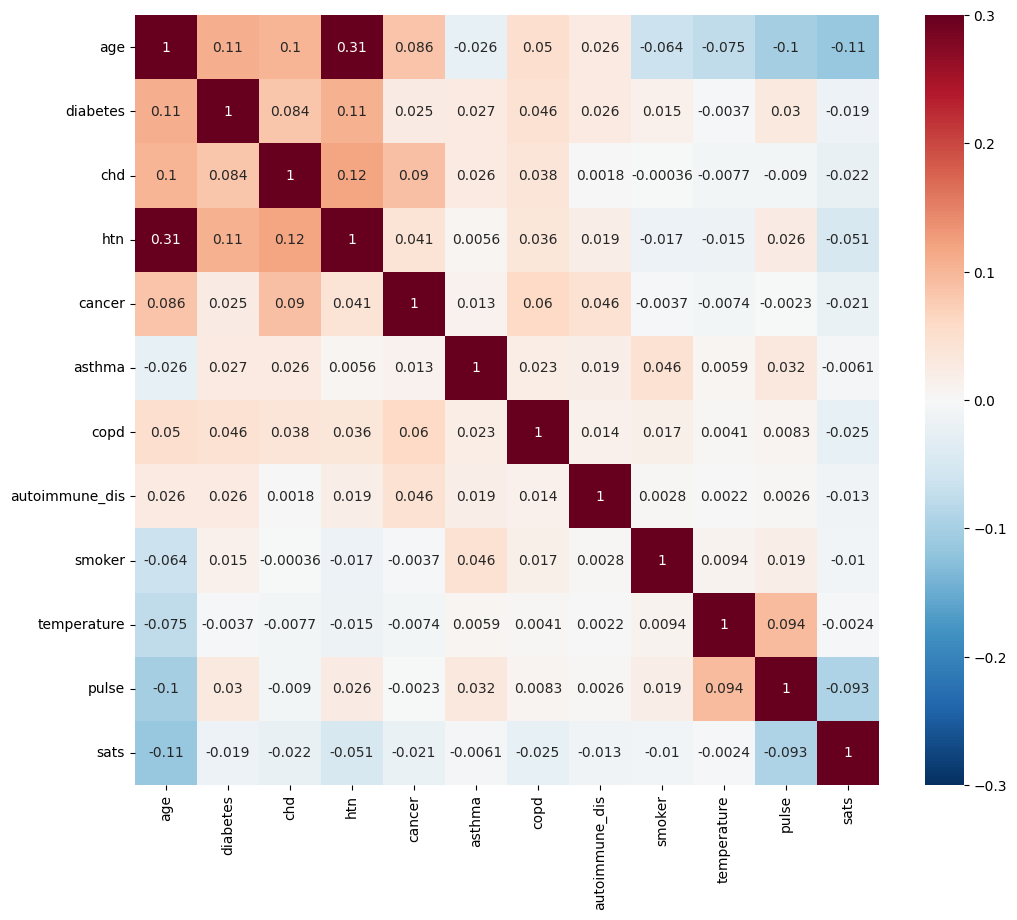

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = X.corr(numeric_only=True)
fig, ax = plt.subplots(figsize=(12, 10))
_ = sns.heatmap(correlation_matrix, annot=True,vmin=-.3, vmax=.3, center=0, cmap="RdBu_r", ax=ax)

## Categorial Features

In [9]:
X = X.convert_dtypes()

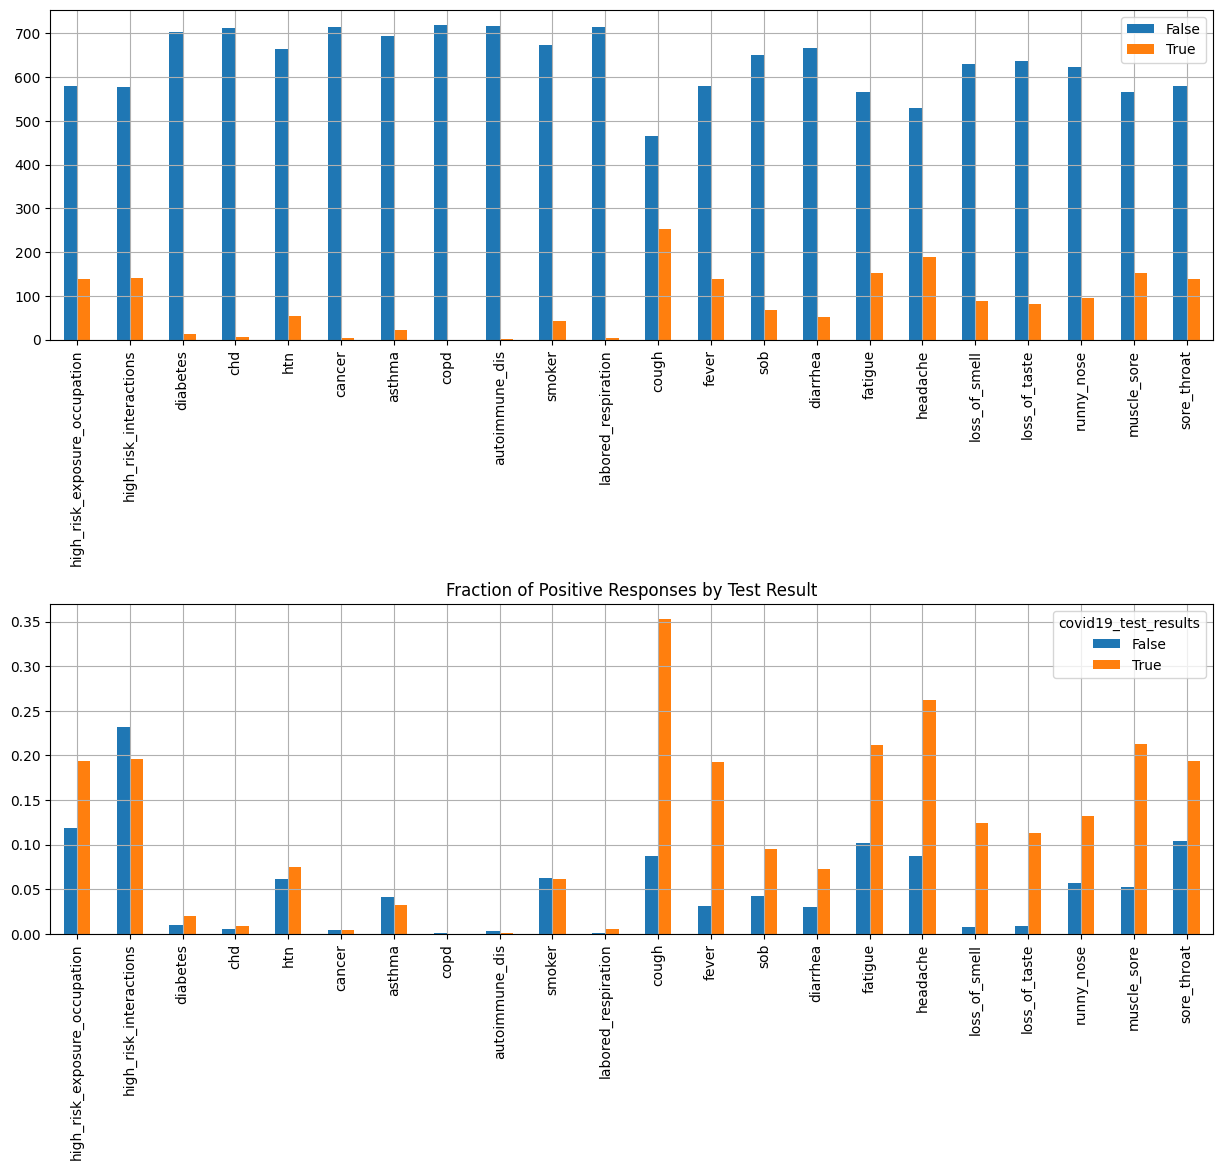

In [10]:
import pandas as pd
plt.rcParams['axes.grid'] = True

boolean_features = X.select_dtypes(["bool"])
positives = boolean_features[target]
value_counts = {}
for column in positives:
    value_counts[column] = positives[column].value_counts()
value_counts = pd.DataFrame(value_counts)

fig, axes = plt.subplots(2,1,figsize=(15, 12))
_ = value_counts.T.plot(kind="bar", ax=axes[0])
_ = plt.title("Symptoms in Positive Patients")
_ = ax.set_xlabel("Feature")
_ = ax.set_ylabel("Count")
plt.grid()

# Group all boolean features by the target variable (COVID-19 test result)
grouped = boolean_features.groupby(target)

# Calculate the fraction of positives in each group.
fractions = grouped.sum() / grouped.count()

_ = fractions.T.plot(kind="bar", ax=axes[1])
_ = plt.title("Fraction of Positive Responses by Test Result")
_ = ax.set_xlabel("Feature")
_ = ax.set_ylabel("Fraction")

plt.subplots_adjust(hspace=0.8)


## Numerical Features

In [13]:
import warnings
warnings.filterwarnings('ignore')

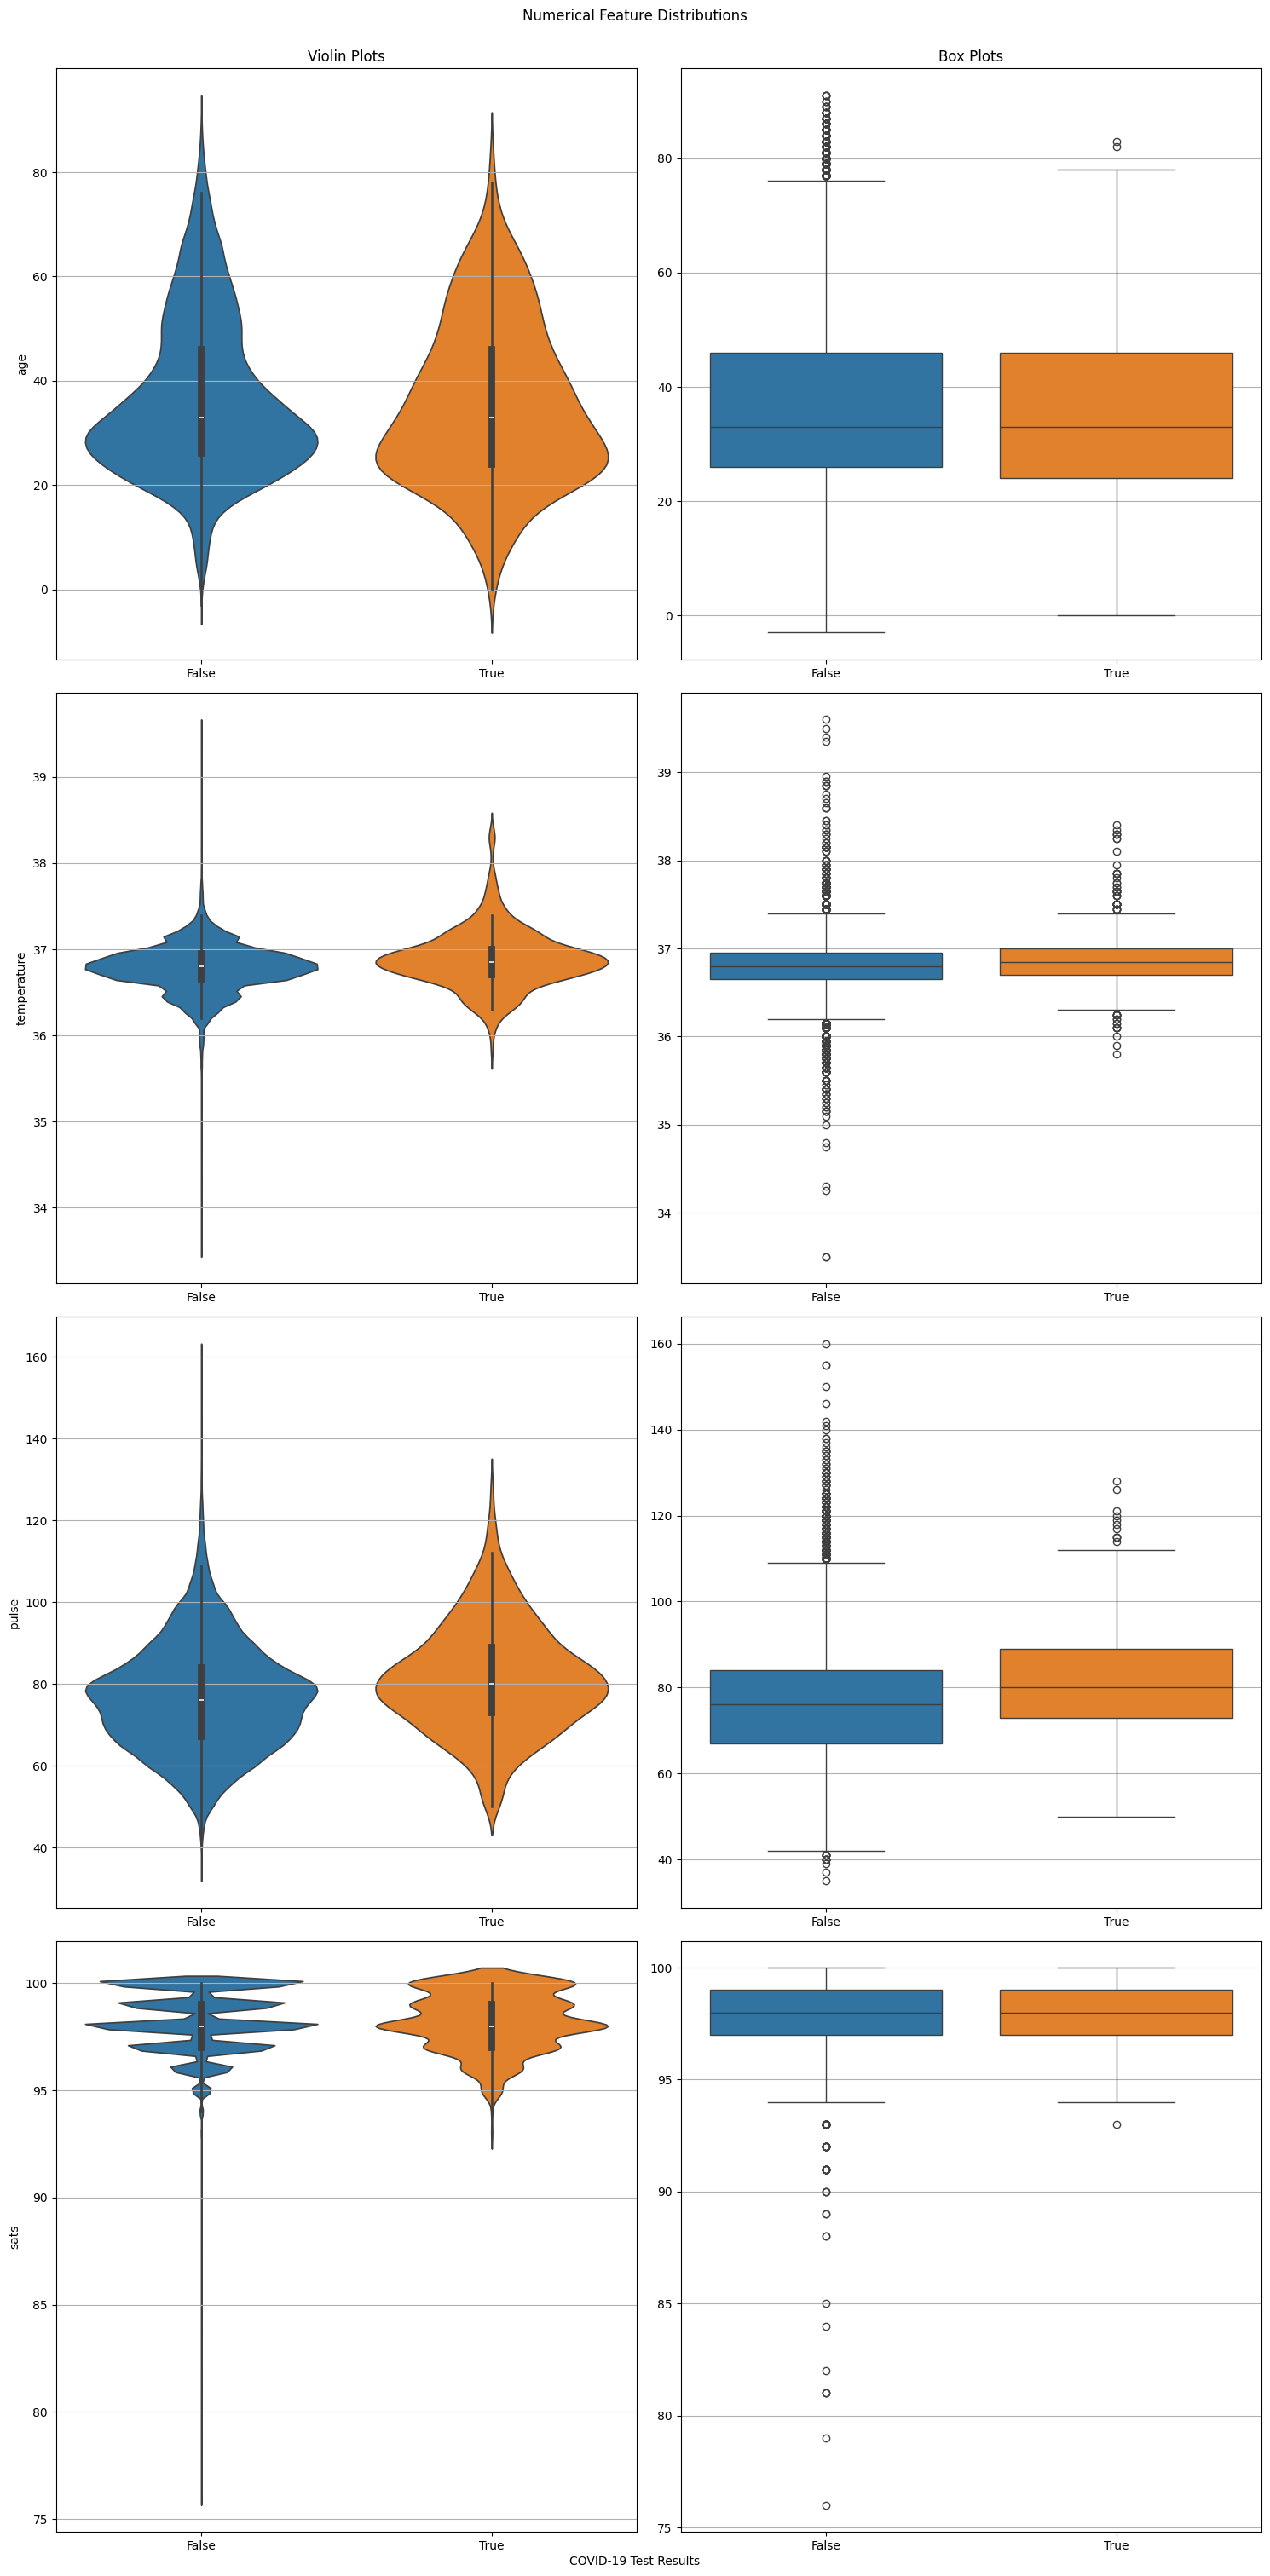

In [14]:
# Select all numerical features.
numerical_features = X.select_dtypes(["float64", "int64"])

# Create distribution plots.
nrows = len(numerical_features.columns)
fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(15, 30))
for i, feature in enumerate(numerical_features):
    sns.violinplot(x=TARGET_COLUMN_NAME, y=feature, hue=TARGET_COLUMN_NAME, data=data, ax=ax[i, 0], legend=False)
    if i == 0:
        ax[i, 0].set_title("Violin Plots")
        ax[i, 1].set_title("Box Plots")        
    sns.boxplot(x=TARGET_COLUMN_NAME, y=feature, hue=TARGET_COLUMN_NAME, data=data, ax=ax[i, 1], legend=False)
    ax[i, 0].set_xlabel("")
    ax[i, 1].set_xlabel("")
    ax[i, 1].set_ylabel("")
_ = fig.text(0.5, 0, "COVID-19 Test Results", ha='center')
_ = fig.suptitle("Numerical Feature Distributions", y=1)
fig.tight_layout()

```{note}
[Violin plots](https://en.wikipedia.org/wiki/Violin_plot) are essentially [box plots](https://en.wikipedia.org/wiki/Box_plot) combined with a [kernel density estimation](https://en.wikipedia.org/wiki/Kernel_density_estimation). While box plots give us a good understanding of the data's quartiles and outliers, violin plots provide us with an informative representation of it's entire distribution.
```

# k-Nearest Neighbors (k-NN)
[k-NN](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) is a simple and useful non-parametric method that is commonly used for both classification and regression. It relies on having some method of calculating distance between data points, and using the the "nearest" observations to predict the target value for new ones.

<figure>
    <center><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/1024px-KnnClassification.svg.png" alt="KNN Illustration" width="400"/></center>
    <figcaption>
        <i>
            Example of k-NN classification. The test sample (green dot) should be classified either to blue squares or to red triangles. If k = 3 (solid line circle) it is assigned to the red triangles because there are 2 triangles and only 1 square inside the inner circle. If k = 5 (dashed line circle) it is assigned to the blue squares (3 squares vs. 2 triangles inside the outer circle).
            <a href="https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm">
                Wikipedia
            </a>
        </i>
    </figcaption>
</figure>

## Loading the Dataset

In [30]:
import pandas as pd

from sklearn.datasets import load_iris

TARGET_NAME = "class"

# Read a type of dictionary with the dataset as well as some metadata.
iris_dataset = load_iris()

# Read the features and targets.
X = pd.DataFrame(iris_dataset.data, columns=iris_dataset.feature_names)
y = pd.Series(iris_dataset.target, name=TARGET_NAME)

## Basic Exploration

In [31]:
import numpy as np

# Class colors
COLORS = "rgba(255, 0, 0, 0.3)", "rgba(0, 255, 0, 0.3)", "rgba(0, 0, 255, 0.3)"

# Create a unified dataframe.
data = pd.concat([X, y], axis="columns")


# Set class background color
def set_class_color(class_index: str) -> str:
    return f"background-color: {COLORS[class_index]};"


def set_class_name(class_index: str) -> str:
    return iris_dataset.target_names[class_index]


# Select some sample indices
sample_indices = np.linspace(0, len(data) - 5, 3, dtype=int)
sample_indices = [index for i in sample_indices for index in range(i, i + 5)]

# Display table
data.iloc[sample_indices, :].style.background_gradient().map(lambda x: set_class_color(x), subset=[TARGET_NAME]).format(
    {TARGET_NAME: set_class_name}).set_properties(**{
        "border": "1px solid black"
    }, subset=[TARGET_NAME]).set_properties(**{
        "text-align": "center"
    }).set_table_styles([
        dict(selector="th", props=[("font-size", "14px")]),
        dict(selector="td", props=[("font-size", "12px")]),
    ]).format("{:.2f}", subset=[col for col in data.columns if col != TARGET_NAME])

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.10,3.50,1.40,0.20,setosa
1,4.90,3.00,1.40,0.20,setosa
2,4.70,3.20,1.30,0.20,setosa
3,4.60,3.10,1.50,0.20,setosa
4,5.00,3.60,1.40,0.20,setosa
72,6.30,2.50,4.90,1.50,versicolor
73,6.10,2.80,4.70,1.20,versicolor
74,6.40,2.90,4.30,1.30,versicolor
75,6.60,3.00,4.40,1.40,versicolor
76,6.80,2.80,4.80,1.40,versicolor


## Train/Test Split

```{admonition} [Train-Test Split](https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/)
    :class: note
A lot can be said regarding the different approaches for model validation and evaluation (which we'll discuss later in the course), but the general guideline is that, since our model should detect underlying trends in the data, we would evaluate its performance over unseen data. Therefore, we'll split our data into a training (for model fitting) and testing (for evaluation).
```

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=0,
                                                    test_size=0.25)

In [22]:
from myst_nb import glue

glue("n_train", len(X_train), display=False)
glue("n_test", len(X_test), display=False)


We now have a training dataset consisting of {glue:}`n_train` observations and a test dataset with {glue:}`n_test` observations.

## Model Creation

```{admonition} [Models and Estimators](https://scikit-learn.org/stable/getting_started.html)
    :class: note
Machine Learning algorithms and models are easily accesible through numberous packages, namely [scikit-learn](https://scikit-learn.org/stable/index.html). While different estimators provide different advantages and pitfalls, they share some basic properties, making it easy for users to use them.

*Since these estimators are basically just algorithms and formulas that need to be tailored to the dataset being used, all estimators have a 'fit' method, (unsurprisingly) fitting the estimators to generalize to any specific data.
```

In [23]:
from sklearn.neighbors import KNeighborsClassifier

k = 1

knn = KNeighborsClassifier(n_neighbors=k)
_ = knn.fit(X_train, y_train)

## Model Evaluation

### Misclassification Rate / Accuracy

<figure>
    <center><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/f0453f2614cd29f5dd49c2c9a0ef807985128e9e" alt="Accuracy" width="400"/></center>
    <figcaption>
        <i>
            Accuracy is defined as 1-error rate. It is used as a statistical measure of how well a classification test performes.
            <a href="https://en.wikipedia.org/wiki/Accuracy_and_precision">
                Wikipedia
            </a>
        </i>
    </figcaption>
</figure>

In [24]:
import numpy as np

y_predicted = knn.predict(X_test)

misclassification_rate = np.mean(y_predicted != y_test) * 100

In [25]:
glue("misclassification_rate", f"{misclassification_rate:.3f}", display=False)
glue("n_correct", (y_predicted == y_test).sum(), display=False)

Our model achieved a misclassification_rate of {glue:}`misclassification_rate`%, meaning it correctly predicted {glue:}`n_correct` of {glue:}`n_test` target values in our test set.

Another way to look at it is:

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predicted) * 100

97.36842105263158

### Confusion Matrix

<figure>
    <center><img src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*qcK0IMq6gxIsoKzaTmSYiw.jpeg" alt="Confusion Matrix" width="400"/></center>
    <figcaption>
        <i>
            A confusion matrix is a table that is often used to describe the performance of a classification model on a set of data for which the true values are known.
            <a href="https://shivang-ahd.medium.com/all-about-confusion-matrix-preparing-for-interview-questions-fddea115a7ee">
                Medium
            </a>
        </i>
    </figcaption>
</figure>

In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predicted)

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]])

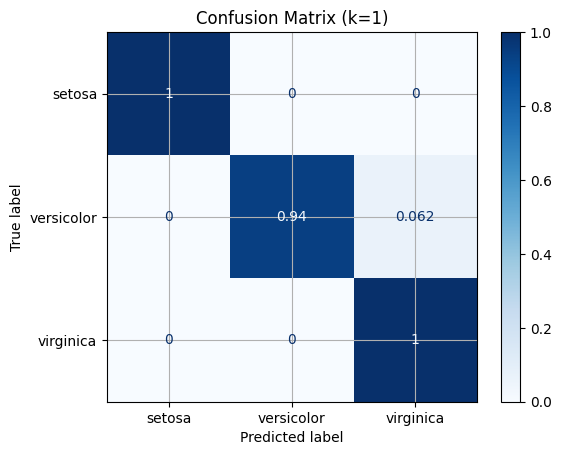

In [29]:
import matplotlib.pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay


disp = ConfusionMatrixDisplay.from_estimator(knn,
                             X_test,
                             y_test,
                             display_labels=iris_dataset.target_names,
                             cmap=plt.cm.Blues,
                             normalize="true")
_ = disp.ax_.set_title(f"Confusion Matrix (k={k})")

# Linear Regression

> In statistics, linear regression is a linear approach to modeling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables). [*Wikipedia*](https://en.wikipedia.org/wiki/Linear_regression)

Using linear regression with Python is as easy as running:

```python
>>> from sklearn.linear_model import LinearRegression
>>> model = LinearRegression()
>>> model.fit(X_train, y_train)
>>> predictions = model.predict(X_test)
```

First, let's reproduce `scikit-learn`'s [Linear Regerssion Example](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#linear-regression-example) using the prepackaged `diabetes` dataset.

#### Loading the dataset

In [33]:
import pandas as pd

from sklearn import datasets

# Read the dataset as a pandas DataFrame
dataset = datasets.load_diabetes(as_frame=True)

# Create observations matrix and target vector
X, y = dataset.data, dataset.target

# Create a unified DataFrame containing both
data = pd.concat([X, y], axis=1)

#### Raw Inspection

In [34]:
import numpy as np
import pandas as pd

# Select some sample indices
sample_indices = np.linspace(0, len(X) - 4, 4, dtype=int)
sample_indices = [index for i in sample_indices for index in range(i, i + 4)]

# Print data table (features and target)
data.iloc[sample_indices, :].style.set_properties(**{
    "text-align": "center",
}).set_properties(**{
    "border-left": "4px solid black"
}, subset=['target']).set_table_styles([
    dict(selector="th", props=[("font-size", "13px")]),
    dict(selector="td", props=[("font-size", "11px")]),
]).background_gradient().format("{:.3f}")

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038,0.051,0.062,0.022,-0.044,-0.035,-0.043,-0.003,0.020,-0.018,151.000
1,-0.002,-0.045,-0.051,-0.026,-0.008,-0.019,0.074,-0.039,-0.068,-0.092,75.000
2,0.085,0.051,0.044,-0.006,-0.046,-0.034,-0.032,-0.003,0.003,-0.026,141.000
3,-0.089,-0.045,-0.012,-0.037,0.012,0.025,-0.036,0.034,0.023,-0.009,206.000
146,-0.031,0.051,0.060,0.001,0.012,0.032,-0.043,0.034,0.015,0.007,178.000
147,-0.056,-0.045,0.093,-0.019,0.015,0.023,-0.029,0.025,0.026,0.040,128.000
148,-0.060,0.051,0.015,-0.019,0.037,0.048,0.019,-0.003,-0.031,-0.001,96.000
149,-0.049,0.051,-0.005,-0.047,-0.021,-0.020,-0.069,0.071,0.061,-0.038,126.000
292,0.009,-0.045,-0.022,-0.032,-0.050,-0.069,0.078,-0.071,-0.063,-0.038,84.000
293,-0.071,-0.045,0.093,0.013,0.020,0.043,0.001,0.000,-0.055,-0.001,200.000


#### Feature Correlation

We can use `seaborn`'s [`heatmap`](http://seaborn.pydata.org/generated/seaborn.heatmap.html) function to inspect feature correlations.

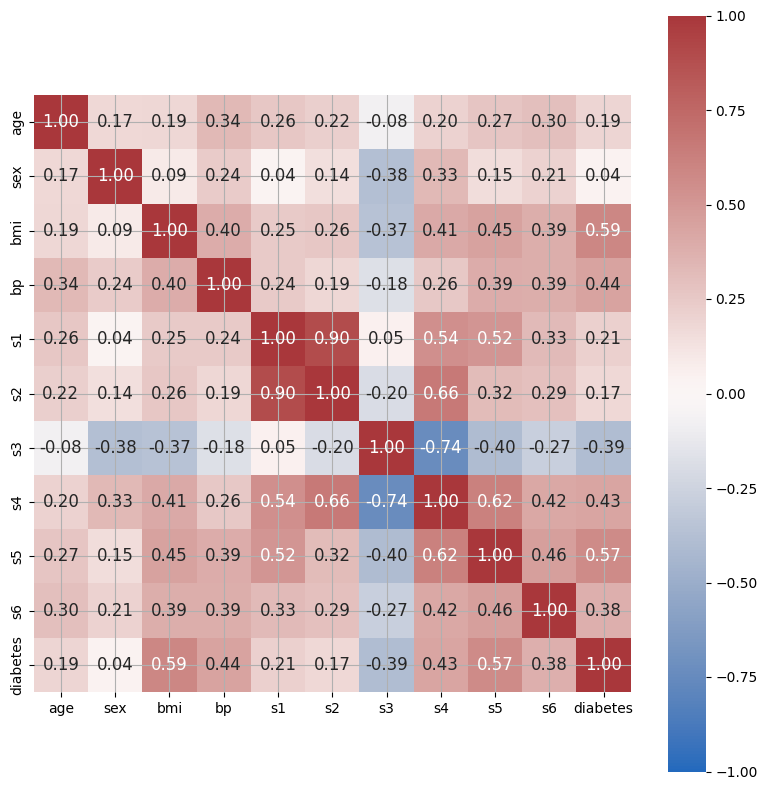

In [36]:
import seaborn as sns

# Calculate correlation matrix using NumPy
correlation_matrix = np.corrcoef(data.values.T)

# Plot correlation matrix using seaborn
fig, ax = plt.subplots(figsize=(8, 8))
tick_labels = list(X.columns) + ['diabetes']
hm = sns.heatmap(
    correlation_matrix,
    ax=ax,
    cbar=True,  # Show colorbar
    cmap="vlag",  # Specify colormap
    vmin=-1,  # Min. value for colormapping
    vmax=1,  # Max. value for colormapping
    annot=True,  # Show the value of each cell
    square=True,  # Square aspect ratio in cell sizing
    fmt='.2f',  # Float formatting
    annot_kws={'size':
               12},  # Font size of the values displayed within the cells
    xticklabels=tick_labels,  # x-axis labels
    yticklabels=tick_labels)  # y-axis labels
plt.tight_layout()
plt.show()

### Simple Linear Regression

Simple linear regression is a linear regression model with a single explanatory variable. `bmi` seems to show a discernible linear relationship with the target variable, so let's go with that one. 

In [37]:
from sklearn.model_selection import train_test_split

# Create a vector of the single predictor values
simple_X = X.bmi.to_numpy().reshape(len(X), 1)

# Split for simple linear regression
simple_X_train, simple_X_test, y_train, y_test = train_test_split(simple_X,
                                                                  y,
                                                                  random_state=0,
                                                                  test_size=0.2)

#### Model Creation

In [38]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
_ = model.fit(simple_X_train, y_train)

#### Model Application

In [39]:
simple_y_pred = model.predict(simple_X_test)

#### Model Evaluation

First, we'll plot our predicted values alongside the observed values, as well as the regression line estimated by our model.

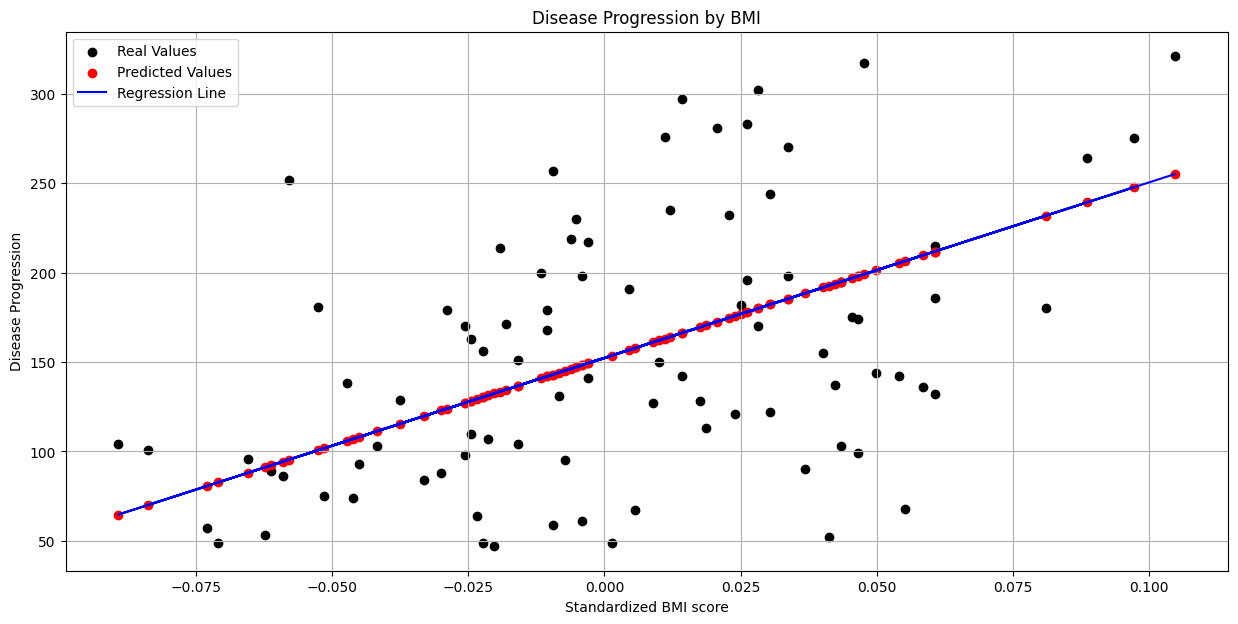

In [40]:
# Create figure
fig, ax = plt.subplots(figsize=(15, 7))

# Plot real values scatter plot
_ = plt.scatter(simple_X_test, y_test, color="black", label="Real Values")

# Plot predicted values scatter plot
_ = plt.scatter(simple_X_test,
                simple_y_pred,
                color="red",
                label="Predicted Values")

# Plot regression line
_ = plt.plot(simple_X_test,
             simple_y_pred,
             color="blue",
             label="Regression Line")

# Show legend
_ = plt.legend()

# Set title
title = "Disease Progression by BMI"
plt.title(title)

# Sex axis labels
ax.set_xlabel("Standardized BMI score")
_ = ax.set_ylabel("Disease Progression")

We can also use the [`sklearn.metrics`](https://scikit-learn.org/stable/modules/model_evaluation.html) module to calculate the [MSE](https://en.wikipedia.org/wiki/Mean_squared_error) and [coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination) ($R^2$).

In [41]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, simple_y_pred)
r_squared = r2_score(y_train, model.predict(simple_X_train))
print(f"Coefficient: {model.coef_[0]:.2f}")
print(f"Intercept: {model.intercept_:.2f}")
print(f'Mean Squared Error: {mse:.2f}')
print(f'Coefficient of Determination: {r_squared:.2f}')

Coefficient: 981.66
Intercept: 152.29
Mean Squared Error: 4150.68
Coefficient of Determination: 0.38


### Multiple Linear Regression

General notation:

![OLS](https://wikimedia.org/api/rest_v1/media/math/render/svg/5d4d7a9152344a9b203e651e82834c16cb085365)

Calculating the coefficient vector of the least-squares hyperplane:

![OLS beta hat](https://wikimedia.org/api/rest_v1/media/math/render/svg/b6001f896b83cf90fdc5c544743ceec61b7c83fd)

#### Multiple Linear Regression using `sklearn`

##### Model Creation

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=0,
                                                    test_size=0.2)

multiple_model = LinearRegression()
_ = multiple_model.fit(X_train, y_train)

##### Model Application

In [44]:
y_pred_all = multiple_model.predict(X_test)

##### Model Evaluation

In [45]:
mse_all = mean_squared_error(y_train, multiple_model.predict(X_train))
r2_score_all = r2_score(y_train, multiple_model.predict(X_train))

In [47]:
betas_all = [beta.round(2) for beta in multiple_model.coef_.flatten()]

print(f"Coefficient: {betas_all}")
print(f'Mean Squared Error: {mse_all:.2f}')
print(f'Coefficient of Determination: {r2_score_all:.2f}')

Coefficient: [-35.55, -243.17, 562.76, 305.46, -662.7, 324.21, 24.75, 170.32, 731.64, 43.03]
Mean Squared Error: 2734.75
Coefficient of Determination: 0.55
